# Lab01 Weeks 1 & 2

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Use this image for all four questions

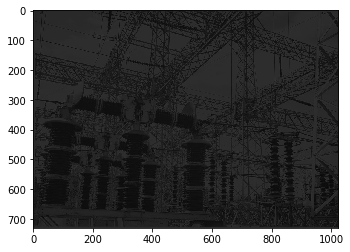

In [66]:
ansel_img = cv2.imread('ansel_adams.jpg')
plt.imshow(ansel_img)

## Question 1

### Contrast Stretching

To perform contrast stretching we perform

$Tr = (Or - c)(\frac{b-a}{d-c})+a$

Where Or is the original image, C is the min pixel value, D is the max pixel value, a -> b describes the full contrast of the image.

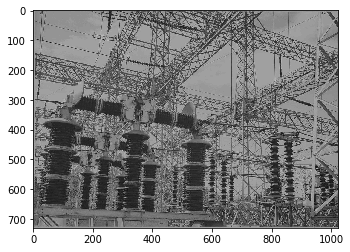

In [67]:
a = 0
b = 255
c = np.min(ansel_img)
d = np.max(ansel_img)
ansel_stretched = (ansel_img - c)*int(((b-a)/(d-c)))+a
plt.imshow(ansel_stretched)

## Question 2

### Histogram

Shows the frequency of different pixel intensity values

(array([4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4200e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4100e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.3000e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6730e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3500e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.7600e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7029e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5879e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2438e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7078e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4366e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3431e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.33

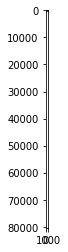

In [89]:
freq, vals = np.histogram(ansel_stretched, bins=256, range=(0,256))
dim = np.shape(ansel_stretched)
ansel_grayscale = cv2.cvtColor(ansel_stretched, cv2.COLOR_BGR2GRAY)
plt.hist(np.reshape(ansel_grayscale, (dim[0]*dim[1])), bins=256)

## Question 3

### Image Edges

Apply the Sobel operator to get image gradients

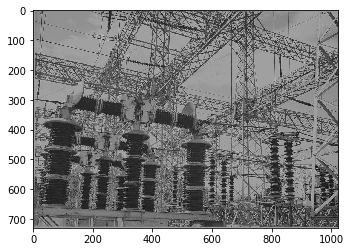

In [91]:
plt.imshow(ansel_grayscale, cmap='gray', vmin=0, vmax=255)

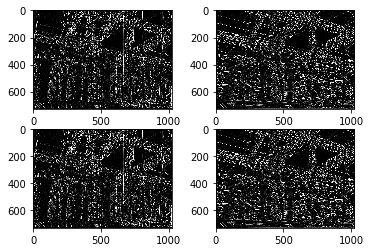

In [100]:
F_x = np.array([-1,0,1,-2,0,2,-1,0,1])
F_x = np.reshape(F_x, (3,3))

F_y = np.array([-1,-2,-1,0,0,0,1,2,1])
F_y = np.reshape(F_y, (3,3))

grad_x = cv2.filter2D(ansel_stretched, -1, F_x)
grad_y = cv2.filter2D(ansel_stretched, -1, F_y)

sobel_x = cv2.Sobel(ansel_stretched, cv2.CV_8U, 1, 0, ksize=3)
sobel_y = cv2.Sobel(ansel_stretched, cv2.CV_8U, 0, 1, ksize=3)


fig, axes = plt.subplots(2,2)

axes[0,0].imshow(grad_x)
axes[0,1].imshow(grad_y)
axes[1,0].imshow(sobel_x)
axes[1,1].imshow(sobel_y)

## Question 4

We create the Laplacian filter now

In [107]:
lpf = np.array([0,-1,0,-1,4,-1,0,-1,0])
lpf = np.reshape(lpf, (3,3))
print(lpf)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


Now we apply the kernel as a filter

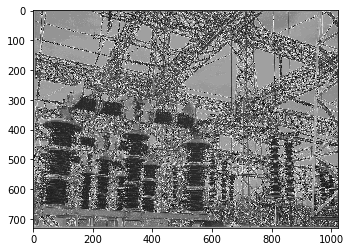

In [110]:
ansel_img_sharp = cv2.filter2D(ansel_stretched, -1, lpf)
plt.imshow(ansel_img_sharp+ansel_stretched)

In [113]:
cv2.imwrite('ansel_laplace.jpg',ansel_img_sharp)
cv2.imwrite('ansel_stretched.jpg', ansel_stretched)
cv2.imwrite('ansel_sharpened.jpg', ansel_img_sharp+ansel_stretched)

True